<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/Avalanche-pred/Avalanche_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.metrics import classification_report,accuracy_score
from tqdm.notebook import tqdm

In [149]:
from scipy.stats import ttest_rel

In [4]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
svc  =SVC(kernel='linear')
scaler = StandardScaler()
le = LabelEncoder()

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Avalanche-prediction.csv')

In [7]:
data.shape

(98065, 29)

In [8]:
data.sample(5)

,date,hydrYear,slfCode,aspect,warningRegion_ID,dangerLevelQualityChecked,HS,p_decisive,z_decisive,gt_decisive,...,Psize3_zdeep,Psize4_zdeep,Psize3_zn72,Psize4_zn72,Psize2_zn24,Psize2_zdeep,Psize3_zn24,Psize4_zn24,Psize5_zn24,Psize5_zdeep
13931,2009-04-08 12:00:00,2009,SMN2,N,7121,1,129.83,0.512018,81.39,550,...,0.609268,0.108917,0.178671,0.024195,0.572388,0.979623,0.178668,0.024195,0.001082,0.004098
68937,2020-02-27 12:00:00,2020,ROT3,E,5221,2,189.47,0.483685,75.48,550,...,0.574740,0.098173,0.214820,0.028984,0.618352,0.973730,0.194603,0.026287,0.001162,0.003721
58453,2019-01-14 12:00:00,2019,MEI2,E,2221,5,249.81,0.954983,140.13,431,...,0.917970,0.376218,0.758382,0.176916,0.944479,0.999422,0.468256,0.071450,0.002786,0.015406
55970,2018-04-25 12:00:00,2018,LAG2,N,7111,1,167.28,0.452292,164.13,550,...,0.920308,0.382216,0.178671,0.024195,0.572388,0.999455,0.178668,0.024195,0.001082,0.015733
28122,2013-12-14 12:00:00,2014,ELA2,N,5231,1,48.40,0.189354,5.42,550,...,0.198732,0.026834,0.178671,0.024195,0.572388,0.629502,0.178668,0.024195,0.001082,0.001182


In [9]:
data.describe()

,hydrYear,warningRegion_ID,dangerLevelQualityChecked,HS,p_decisive,z_decisive,gt_decisive,p_deepest,z_deepestUnstable,gt_deepest,...,Psize3_zdeep,Psize4_zdeep,Psize3_zn72,Psize4_zn72,Psize2_zn24,Psize2_zdeep,Psize3_zn24,Psize4_zn24,Psize5_zn24,Psize5_zdeep
count,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,36147.000000,98065.000000,36147.000000,...,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000
mean,2016.068628,4373.026177,2.348687,157.002527,0.601269,56.916031,496.061500,0.839727,63.550391,482.906189,...,0.468847,0.124711,0.271207,0.042672,0.632865,0.850485,0.209789,0.028887,0.001257,0.007843
std,5.325169,1575.737221,0.939542,91.876813,0.271507,60.402720,196.273692,0.058059,63.931224,151.213742,...,0.256603,0.168419,0.146427,0.046412,0.099089,0.148188,0.064714,0.012857,0.000658,0.031736
min,2002.000000,1112.000000,1.000000,30.000000,0.011250,0.290000,110.000000,0.770002,0.290000,110.000000,...,0.179700,0.024330,0.178671,0.024195,0.572388,0.575508,0.178668,0.024195,0.001082,0.001087
25%,2013.000000,4113.000000,2.000000,89.410000,0.360583,12.440000,440.000000,0.792102,13.460000,450.000000,...,0.231534,0.031271,0.178671,0.024195,0.572388,0.707617,0.178668,0.024195,0.001082,0.001349
50%,2018.000000,4222.000000,2.000000,138.270000,0.593235,38.710000,550.000000,0.823000,45.540000,490.000000,...,0.395720,0.057081,0.202207,0.027293,0.572388,0.908492,0.178668,0.024195,0.001082,0.002281
75%,2021.000000,5212.000000,3.000000,204.110000,0.873388,79.430000,550.000000,0.876149,92.070000,550.000000,...,0.668785,0.130956,0.301883,0.041438,0.661424,0.987165,0.211239,0.028507,0.001245,0.004879
max,2022.000000,8212.000000,5.000000,819.370000,0.999814,579.240000,990.000000,0.999814,579.240000,990.000000,...,0.999996,0.999527,0.999943,0.995708,0.999996,1.000000,0.994052,0.843441,0.089049,0.935332


In [10]:
data.columns

Index(['date', 'hydrYear', 'slfCode', 'aspect', 'warningRegion_ID',
       'dangerLevelQualityChecked', 'HS', 'p_decisive', 'z_decisive',
       'gt_decisive', 'p_deepest', 'z_deepestUnstable', 'gt_deepest', 'z_pp',
       'HN24', 'HN72_24', 'PAvD_pdec', 'PAvD_zn72', 'PAvD_pdec_zn72',
       'Psize3_zdeep', 'Psize4_zdeep', 'Psize3_zn72', 'Psize4_zn72',
       'Psize2_zn24', 'Psize2_zdeep', 'Psize3_zn24', 'Psize4_zn24',
       'Psize5_zn24', 'Psize5_zdeep'],
      dtype='object')

In [11]:
data.isna().sum()

date                             0
hydrYear                         0
slfCode                          0
aspect                           0
warningRegion_ID                 0
dangerLevelQualityChecked        0
HS                               0
p_decisive                       0
z_decisive                       0
gt_decisive                      0
p_deepest                    61918
z_deepestUnstable                0
gt_deepest                   61918
z_pp                             0
HN24                             0
HN72_24                          0
PAvD_pdec                        0
PAvD_zn72                        0
PAvD_pdec_zn72                   0
Psize3_zdeep                     0
Psize4_zdeep                     0
Psize3_zn72                      0
Psize4_zn72                      0
Psize2_zn24                      0
Psize2_zdeep                     0
Psize3_zn24                      0
Psize4_zn24                      0
Psize5_zn24                      0
Psize5_zdeep        

Dropping of unnecessary columns

In [12]:
drop_col = ['date', 'hydrYear', 'slfCode', 'aspect', 'warningRegion_ID']
data. drop(drop_col,axis=1,inplace=True)

In [13]:
data.shape

(98065, 24)

Distribution analysis of Parameters

In [14]:
data['p_deepest'].describe()

count    36147.000000
mean         0.839727
std          0.058059
min          0.770002
25%          0.792102
50%          0.823000
75%          0.876149
max          0.999814
Name: p_deepest, dtype: float64

<Axes: xlabel='p_deepest', ylabel='Density'>

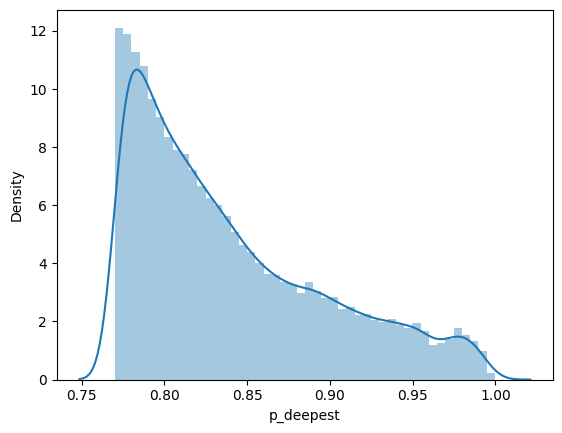

In [15]:
sns.distplot(data['p_deepest'])

In [16]:
data['gt_deepest'].describe()

count    36147.000000
mean       482.906189
std        151.213742
min        110.000000
25%        450.000000
50%        490.000000
75%        550.000000
max        990.000000
Name: gt_deepest, dtype: float64

<Axes: xlabel='gt_deepest', ylabel='Density'>

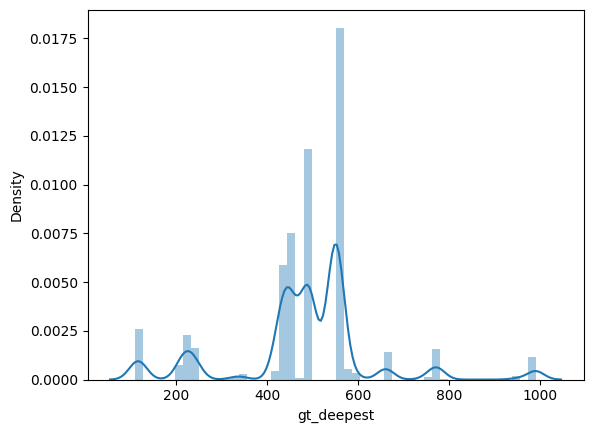

In [17]:
sns.distplot(data['gt_deepest'])

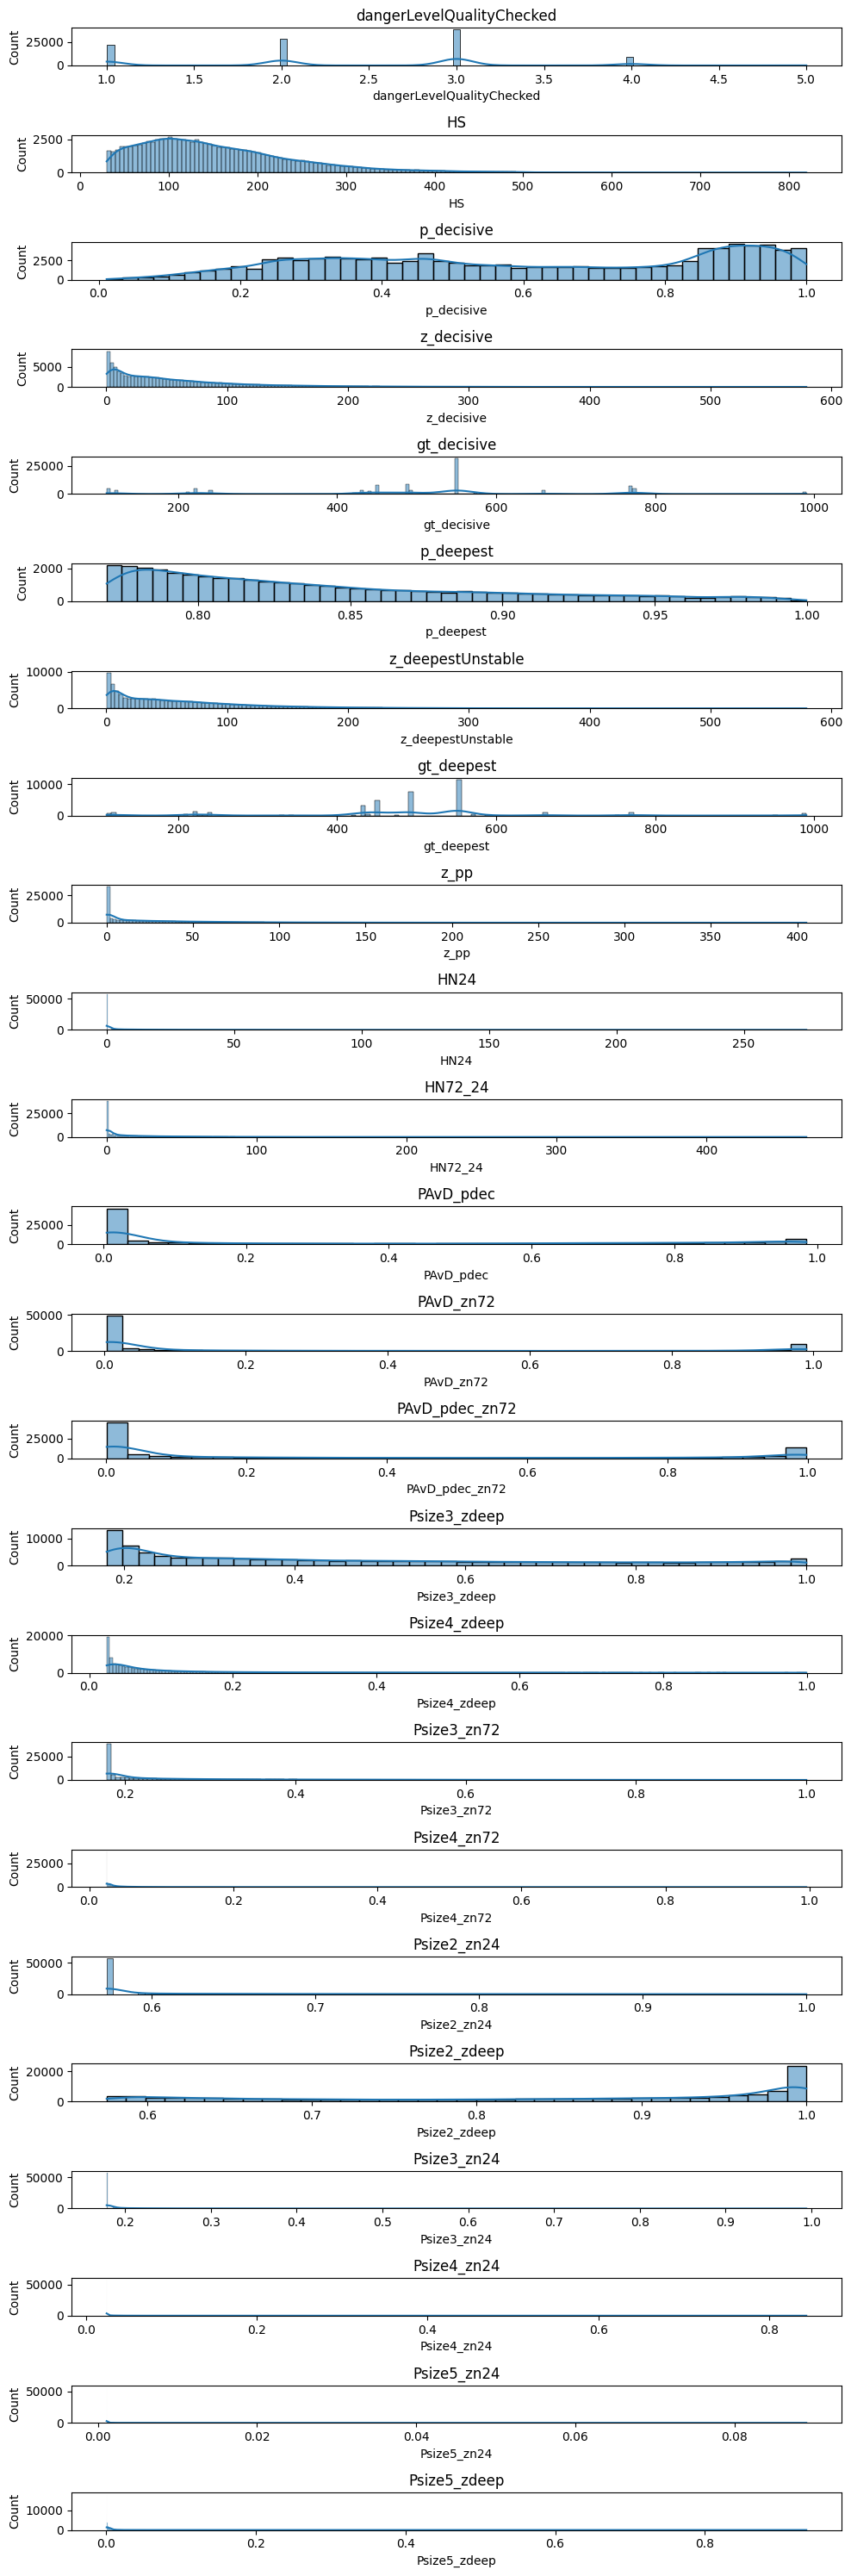

In [18]:
fig, ax = plt.subplots(24, 1, figsize=(10,30))
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [19]:
data.describe()

,dangerLevelQualityChecked,HS,p_decisive,z_decisive,gt_decisive,p_deepest,z_deepestUnstable,gt_deepest,z_pp,HN24,...,Psize3_zdeep,Psize4_zdeep,Psize3_zn72,Psize4_zn72,Psize2_zn24,Psize2_zdeep,Psize3_zn24,Psize4_zn24,Psize5_zn24,Psize5_zdeep
count,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,36147.000000,98065.000000,36147.000000,98065.000000,98065.000000,...,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000,98065.000000
mean,2.348687,157.002527,0.601269,56.916031,496.061500,0.839727,63.550391,482.906189,29.253578,7.108768,...,0.468847,0.124711,0.271207,0.042672,0.632865,0.850485,0.209789,0.028887,0.001257,0.007843
std,0.939542,91.876813,0.271507,60.402720,196.273692,0.058059,63.931224,151.213742,39.477018,13.611722,...,0.256603,0.168419,0.146427,0.046412,0.099089,0.148188,0.064714,0.012857,0.000658,0.031736
min,1.000000,30.000000,0.011250,0.290000,110.000000,0.770002,0.290000,110.000000,0.000000,0.000000,...,0.179700,0.024330,0.178671,0.024195,0.572388,0.575508,0.178668,0.024195,0.001082,0.001087
25%,2.000000,89.410000,0.360583,12.440000,440.000000,0.792102,13.460000,450.000000,0.000000,0.000000,...,0.231534,0.031271,0.178671,0.024195,0.572388,0.707617,0.178668,0.024195,0.001082,0.001349
50%,2.000000,138.270000,0.593235,38.710000,550.000000,0.823000,45.540000,490.000000,13.590000,0.000000,...,0.395720,0.057081,0.202207,0.027293,0.572388,0.908492,0.178668,0.024195,0.001082,0.002281
75%,3.000000,204.110000,0.873388,79.430000,550.000000,0.876149,92.070000,550.000000,43.950000,8.592000,...,0.668785,0.130956,0.301883,0.041438,0.661424,0.987165,0.211239,0.028507,0.001245,0.004879
max,5.000000,819.370000,0.999814,579.240000,990.000000,0.999814,579.240000,990.000000,405.260000,274.549000,...,0.999996,0.999527,0.999943,0.995708,0.999996,1.000000,0.994052,0.843441,0.089049,0.935332


Dealing with missing values

In [20]:
data['p_deepest'].isna().sum()

61918

In [21]:
data['p_deepest'].fillna(data['p_deepest'].mode().values[0],inplace=True)

In [22]:
data['gt_deepest'].isna().sum()

61918

In [23]:
data['gt_deepest'].fillna(data['gt_deepest'].mean(),inplace=True)

In [24]:
data.isna().sum()

dangerLevelQualityChecked    0
HS                           0
p_decisive                   0
z_decisive                   0
gt_decisive                  0
p_deepest                    0
z_deepestUnstable            0
gt_deepest                   0
z_pp                         0
HN24                         0
HN72_24                      0
PAvD_pdec                    0
PAvD_zn72                    0
PAvD_pdec_zn72               0
Psize3_zdeep                 0
Psize4_zdeep                 0
Psize3_zn72                  0
Psize4_zn72                  0
Psize2_zn24                  0
Psize2_zdeep                 0
Psize3_zn24                  0
Psize4_zn24                  0
Psize5_zn24                  0
Psize5_zdeep                 0
dtype: int64

In [25]:
data.duplicated().sum()

7

In [26]:
data.drop_duplicates(inplace=True)

Data cleaning

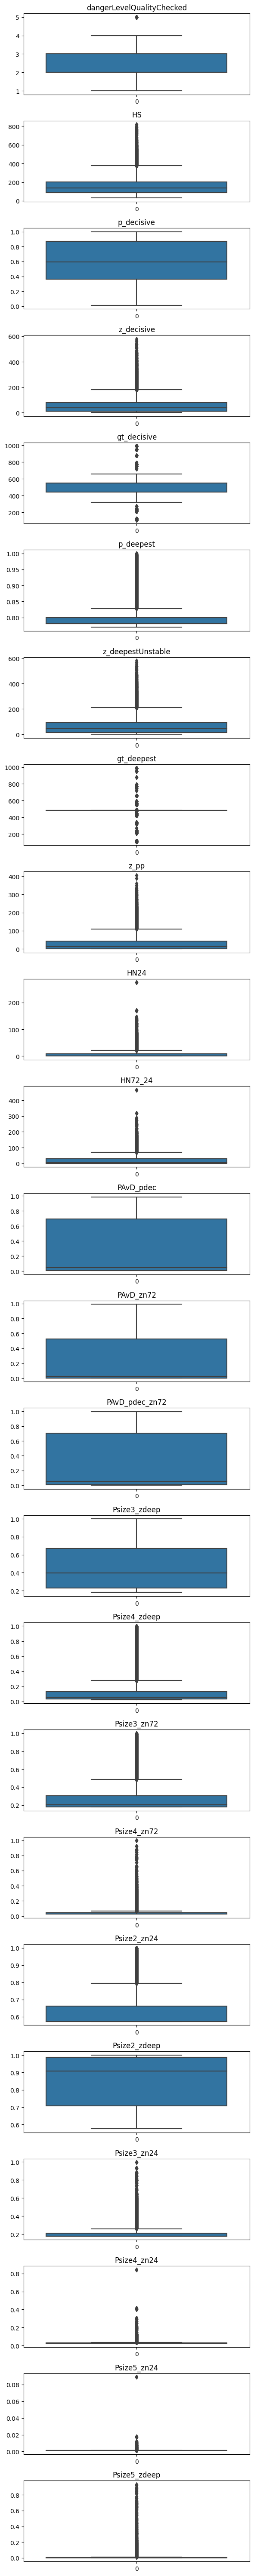

In [27]:
fig, ax = plt.subplots(24, 1,figsize=(6, 60))

for i, col in enumerate(data.columns):
    sns.boxplot(data[col], ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [28]:
quantile_col = ['z_decisive','z_deepestUnstable','p_deepest','z_pp','Psize3_zn72','Psize2_zn24']
z_score_col = ['gt_decisive']

In [29]:
for i in quantile_col:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  IQR = q3-q1
  min_limit = q1-1.5*IQR
  max_limit = q3+1.5*IQR
  data[i] = np.where(data[i]>max_limit,max_limit,np.where(data[i]<min_limit,min_limit,data[i]))

In [30]:
for i in z_score_col:
  mean = data[i].mean()
  std = data[i].std()
  z_score = (data[i]-mean)/std
  min_limit = mean - 3*std
  max_limit = mean + 3*std
  data[i] = np.where(data[i]>max_limit,max_limit,np.where(data[i]<min_limit,min_limit,data[i]))

Analyzing the correlations

<Axes: >

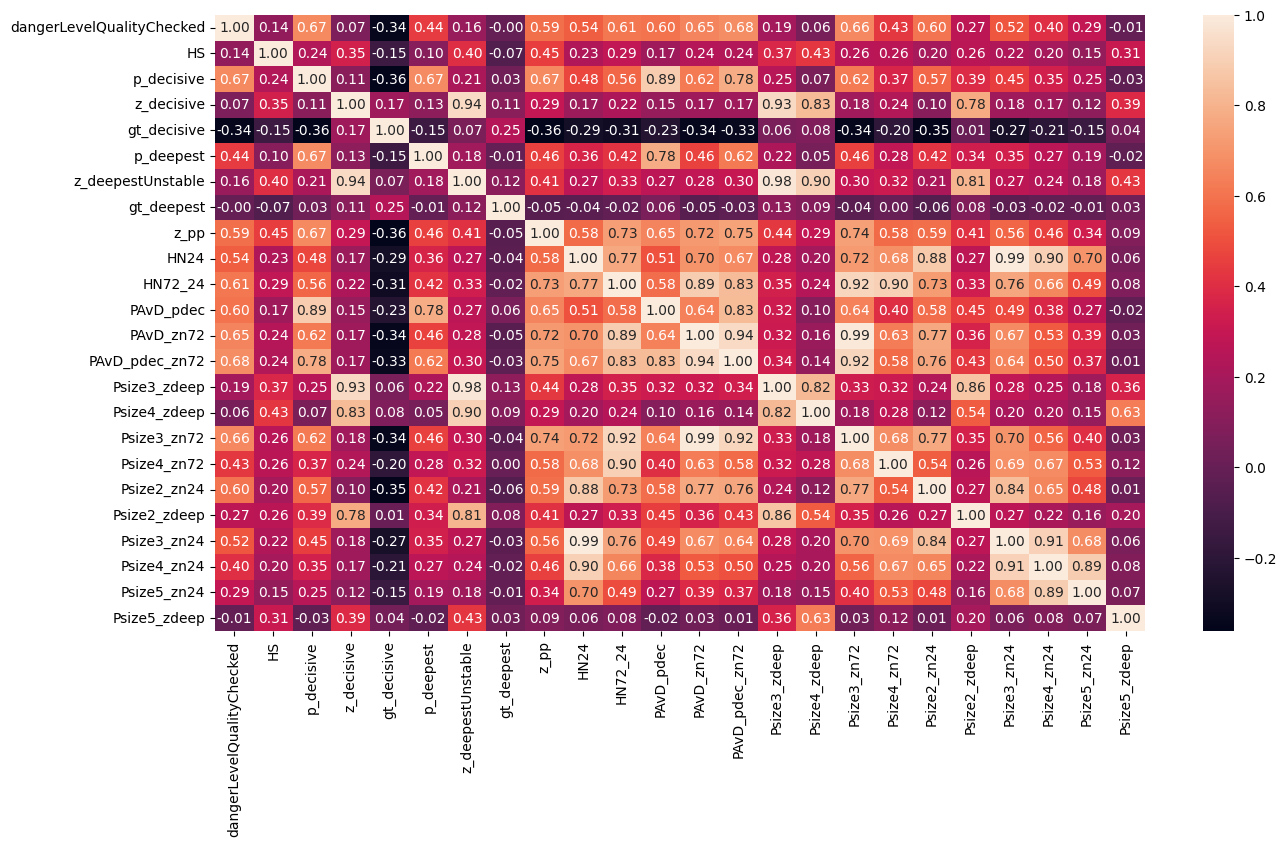

In [31]:
plt.figure(figsize=(15,8)),
sns.heatmap(data.corr(),annot=True,fmt=".2f")

Splitting of data

In [176]:
data.columns

Index(['dangerLevelQualityChecked', 'HS', 'p_decisive', 'z_decisive',
       'gt_decisive', 'p_deepest', 'z_deepestUnstable', 'gt_deepest', 'z_pp',
       'HN24', 'HN72_24', 'PAvD_pdec', 'PAvD_zn72', 'PAvD_pdec_zn72',
       'Psize3_zdeep', 'Psize4_zdeep', 'Psize3_zn72', 'Psize4_zn72',
       'Psize2_zn24', 'Psize2_zdeep', 'Psize3_zn24', 'Psize4_zn24',
       'Psize5_zn24', 'Psize5_zdeep'],
      dtype='object')

In [293]:
X = data.loc[:30000, data.columns != 'dangerLevelQualityChecked']
y = data.loc[:30000, 'dangerLevelQualityChecked']
#Dropping the weakly correlated feature to imporve the accuracy
X.drop(['HS','z_decisive','z_deepestUnstable','Psize3_zdeep','Psize4_zdeep','Psize5_zdeep','gt_deepest','gt_deepest','Psize5_zn24'],inplace=True,axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [294]:
X_train

,p_decisive,gt_decisive,p_deepest,z_pp,HN24,HN72_24,PAvD_pdec,PAvD_zn72,PAvD_pdec_zn72,Psize3_zn72,Psize4_zn72,Psize2_zn24,Psize2_zdeep,Psize3_zn24,Psize4_zn24
21756,0.971670,550.0,0.828239,81.590,8.173,43.086,0.966957,0.859225,0.970058,0.381847,0.054544,0.657284,0.984567,0.209554,0.028280
251,0.311917,772.0,0.780830,0.000,0.000,0.000,0.006493,0.003717,0.002289,0.178671,0.024195,0.572388,0.996929,0.178668,0.024195
22944,0.438625,240.0,0.780830,5.680,0.000,8.600,0.012095,0.048269,0.014398,0.211307,0.028510,0.572388,0.609802,0.178668,0.024195
618,0.453911,550.0,0.780830,13.320,0.000,17.151,0.013508,0.208833,0.040299,0.247883,0.033538,0.572388,0.877207,0.178668,0.024195
17093,0.294583,770.0,0.780830,0.000,0.000,0.000,0.006190,0.003717,0.002027,0.178671,0.024195,0.572388,0.596321,0.178668,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29806,0.931110,550.0,0.828239,23.820,1.875,25.836,0.894873,0.453680,0.789465,0.289141,0.039515,0.592449,0.980957,0.185424,0.025078
5390,0.364568,550.0,0.780830,0.000,0.000,0.000,0.007898,0.003717,0.003327,0.178671,0.024195,0.572388,0.640312,0.178668,0.024195
860,0.846018,550.0,0.828239,109.875,21.970,71.080,0.575038,0.988565,0.994837,0.486653,0.090793,0.778730,0.999840,0.270177,0.036739
15798,0.409111,490.0,0.780830,0.000,0.000,0.000,0.009983,0.003717,0.004581,0.178671,0.024195,0.572388,0.656460,0.178668,0.024195


In [295]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [296]:
X_train_scaled.shape,X_test_scaled.shape,y_train.shape,y_test.shape

((23997, 15), (6000, 15), (23997,), (6000,))

In [297]:
y_train.unique()

array([3, 1, 2, 4])

In [298]:
y_test.unique()

array([1, 2, 3, 4])

Prediction of Avalanche

In [299]:
svc_model = svc.fit(X_train_scaled,y_train)
etc_model= etc.fit(X_train_scaled,y_train)

In [300]:
svc_pred = svc.predict(X_test_scaled)
etc_pred = etc.predict(X_test_scaled)

In [301]:
print(classification_report(svc_pred,y_test))
print(classification_report(etc_pred,y_test))

              precision    recall  f1-score   support

           1       0.85      0.61      0.71      2250
           2       0.40      0.55      0.46      1346
           3       0.68      0.64      0.66      2153
           4       0.31      0.67      0.43       251

    accuracy                           0.61      6000
   macro avg       0.56      0.62      0.57      6000
weighted avg       0.67      0.61      0.63      6000

              precision    recall  f1-score   support

           1       0.73      0.69      0.71      1710
           2       0.61      0.60      0.61      1834
           3       0.76      0.76      0.76      2032
           4       0.68      0.86      0.76       424

    accuracy                           0.70      6000
   macro avg       0.69      0.73      0.71      6000
weighted avg       0.70      0.70      0.70      6000



In [302]:
print(f'The accuracy is of SVC model is   : {(accuracy_score(svc_pred,y_test)*100).round(2)}%')
print(f'The accuracy is of Extra Tree Classifier model is   : {(accuracy_score(etc_pred,y_test)*100).round(2)}%')

The accuracy is of SVC model is   : 61.0%
The accuracy is of Extra Tree Classifier model is   : 69.73%


Building of ANN

In [287]:
X = data.loc[:30000, data.columns != 'dangerLevelQualityChecked']
y = data.loc[:30000, 'dangerLevelQualityChecked']
#Dropping the weakly correlated feature to imporve the accuracy
X.drop(['HS','z_decisive','z_deepestUnstable','Psize3_zdeep','Psize4_zdeep','Psize5_zdeep','gt_deepest','gt_deepest','Psize5_zn24'],inplace=True,axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [288]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [304]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(15,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [305]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [306]:
y_train-=1

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs = 50,batch_size = 32,verbose=1)

In [319]:
print('The Training accuracy of ANN is ',history.history['accuracy'][-1]*100,"%")

The Training accuracy of ANN is  94.66224789619446 %


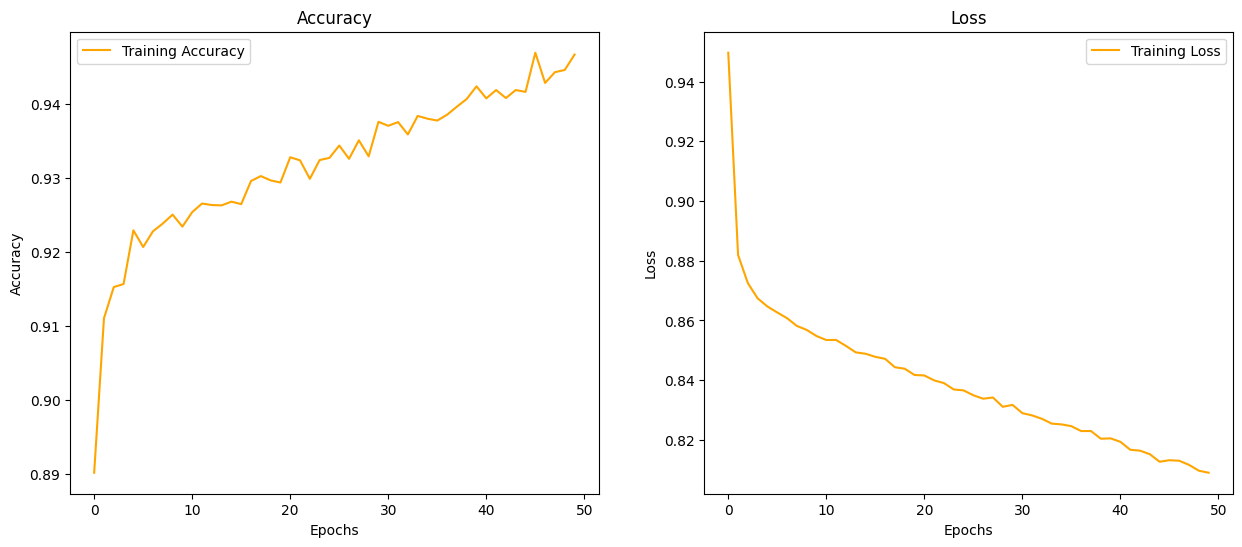

In [321]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))


ax[0].plot(history.history['accuracy'], label='Training Accuracy',color='orange')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()


ax[1].plot(history.history['loss'], label='Training Loss',color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()